## Project Assessment: Data Handling, Preprocessing, and Probability & Statistics for Machine Learning
#### Compiled by: Chisom Elizabeth Omegor

## DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("Loan Prediction data.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Handling missing values
# Filling missing numerical values with median and categorical with mode
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [6]:
#Replacing 3+ with 3 instead
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
# Detecting Outliers using IQR Method
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
# Replacing outliers with median
df['LoanAmount'] = np.where((df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound), df['LoanAmount'].median(), df['LoanAmount'])

In [10]:
# Feature Engineering
# Encoding categorical variables
df.replace({'Gender': {'Male': 1, 'Female': 0},
            'Married': {'Yes': 1, 'No': 0},
            'Education': {'Graduate': 1, 'Not Graduate': 0},
            'Self_Employed': {'Yes': 1, 'No': 0},
            'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
            'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [11]:
# Creating a new feature: Debt-to-Income Ratio
df['Debt_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'] + 1)

In [12]:
# Display dataset after preprocessing
print("\nDataset after Preprocessing:")
print(df.head())


Dataset after Preprocessing:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0         0.0          1              0   
1  LP001003       1        1         1.0          1              0   
2  LP001005       1        1         0.0          1              1   
3  LP001006       1        1         0.0          0              0   
4  LP001008       1        0         0.0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  Debt_Income_Ratio  
0             1.0              2            1          

## EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
#Descriptive Statistic Analysis
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt_Income_Ratio
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,128.451140,342.410423,0.855049,1.037459,0.687296,0.022813
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,44.799645,64.428629,0.352339,0.787482,0.463973,0.009279
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.001580
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.017772
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.023454
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,152.000000,360.000000,1.000000,2.000000,1.000000,0.027705
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,260.000000,480.000000,1.000000,2.000000,1.000000,0.082685


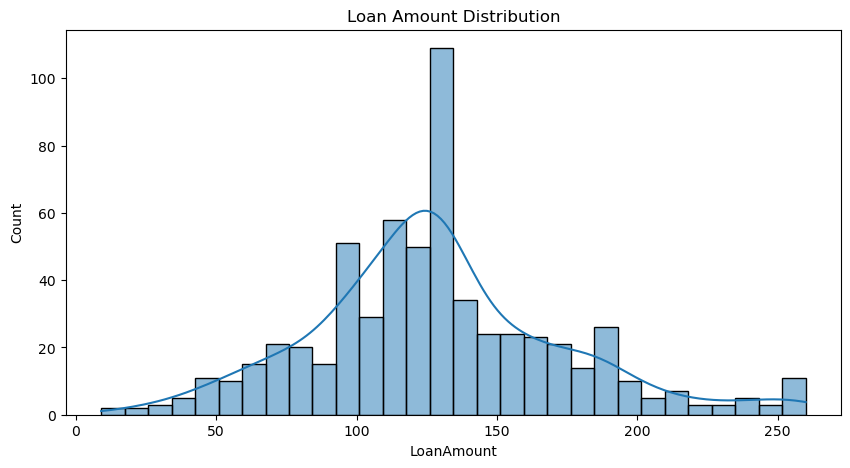

In [14]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

## Key Insights
Most loan amounts are between 80 and 150.
There is a peak around 120-130, meaning many applicants take loans in this range.
Right-skewed distribution: More applicants request lower loan amounts, while fewer applicants request very high loans.

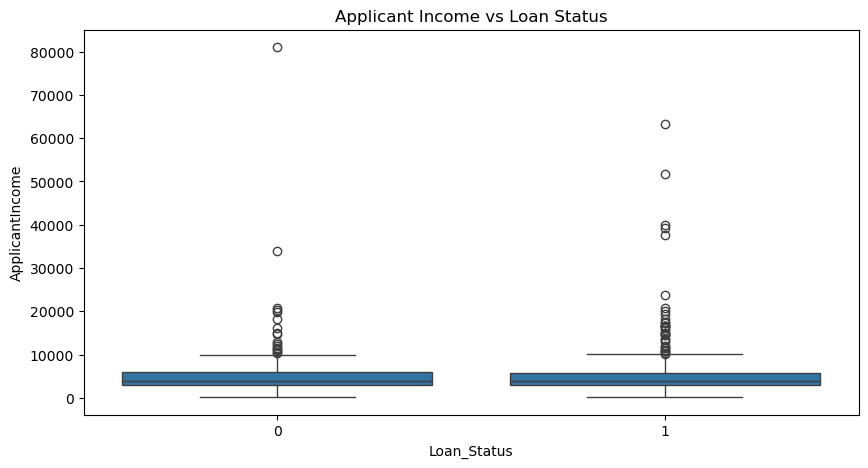

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'])
plt.title("Applicant Income vs Loan Status")
plt.show()

## Key Insights
Outliers are present (incomes above 40,000+).
Loan approval doesn't seem to depend heavily on applicant income, as both approved (1) and rejected (0) applicants have similar income distributions.

In [16]:
# Impact of Credit History on Loan Approval
print("\nLoan Approval Rate by Credit History:")
print(df.groupby('Credit_History')['Loan_Status'].mean())


Loan Approval Rate by Credit History:
Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64


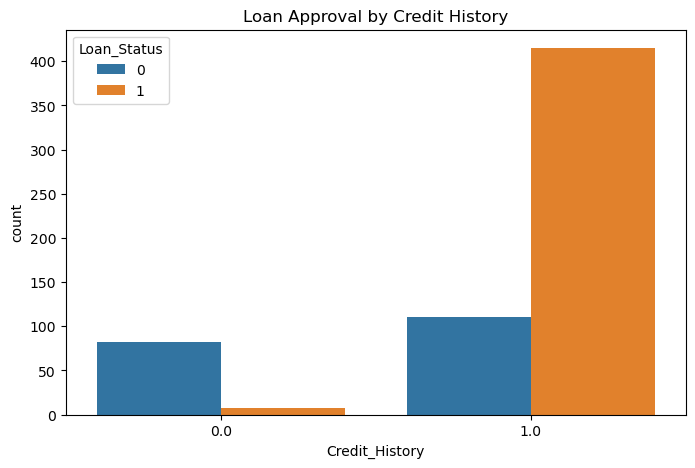

In [17]:
# Loan Approval by Credit History
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Credit_History'], hue=df['Loan_Status'])
plt.title("Loan Approval by Credit History")
plt.show()

## Analysis of Loan Approval by Credit History
Strong correlation between credit history and loan approval

Applicants with a credit history of 1 (good credit history) have significantly higher loan approvals.
Those with a credit history of 0 (no or poor credit history) face high rejection rates.
Credit history plays a crucial role in loan decisions

The number of approved loans for credit history = 1 is significantly larger than for credit history = 0.
A poor or non-existent credit history drastically reduces approval chances.
Minimal approvals for applicants with no credit history

Only a small fraction of applicants with a credit history of 0 got their loans approved.
This could indicate that lenders prioritize applicants with a proven track record of credit repayment.

## Key Insights & Recommendations
If an applicant has no or poor credit history, they should work on improving it before applying.
Loan approval decisions are highly dependent on credit history, so lenders may need to consider alternative assessment methods for individuals with no prior credit records.
If combined with other factors like income level, employment type, or property area, we might get a clearer picture of loan approval trends.

In [18]:
# Self-Employment and Loan Approval
print("\nLoan Approval Rate by Self-Employment:")
print(df.groupby('Self_Employed')['Loan_Status'].mean())


Loan Approval Rate by Self-Employment:
Self_Employed
0    0.687970
1    0.682927
Name: Loan_Status, dtype: float64


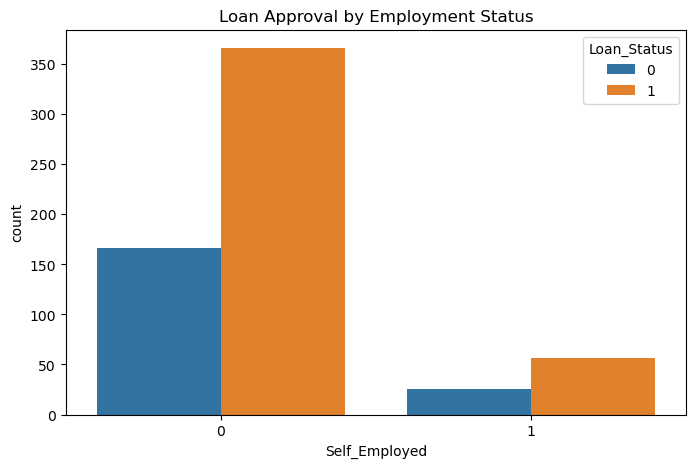

In [19]:
# Loan Approval by Employment status
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'])
plt.title("Loan Approval by Employment Status")
plt.show()

## Analysis of Loan Approval by Employment Status
Higher Loan Approvals for Non-Self-Employed Applicants

Self-employed applicants (1) have significantly fewer loan approvals compared to non-self-employed applicants (0).
The number of approved loans for non-self-employed individuals is much higher.
Self-Employed Applicants Face Higher Rejection Rates

The number of rejected loans for self-employed individuals is small but still significant relative to their approvals.
This suggests that lenders may view self-employed individuals as higher risk, possibly due to irregular income streams or lack of verifiable income documentation.
Loan Approvals are More Favorable for Salaried Applicants

Non-self-employed individuals have a high approval rate compared to self-employed individuals.
This could indicate that lenders prefer applicants with stable, predictable salaries over those with variable incomes.

## Key Insights & Recommendations
Self-employed applicants may need to provide additional financial proof, such as bank statements, tax returns, or audited financials, to improve their loan approval chances.
Lenders could consider alternative credit assessment models for self-employed individuals to ensure fair evaluation.
Further analysis on income levels and credit history of self-employed applicants could provide deeper insights into why they face more rejections.

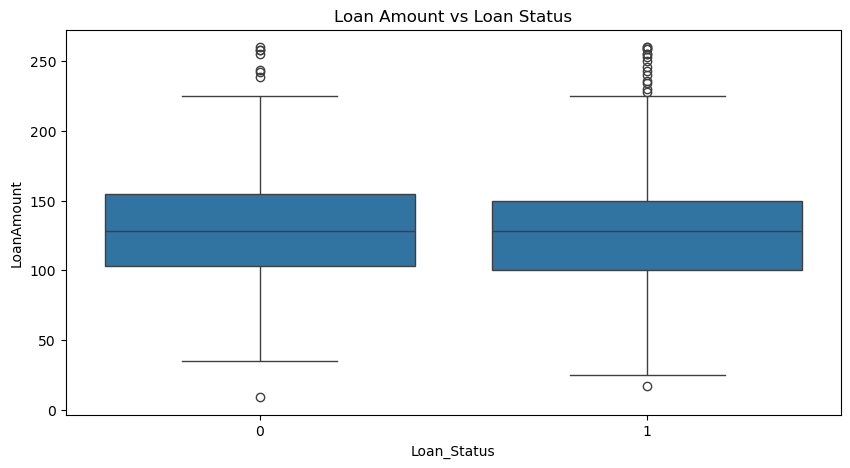

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Loan_Status'], y=df['LoanAmount'])
plt.title("Loan Amount vs Loan Status")
plt.show()

## Key Insights
Outliers in loan amounts (above 250).
Loan approvals and rejections have a similar spread in loan amounts, meaning loan amount may not be a key factor in approval.

In [21]:
# Education vs Loan Approval
print("\nLoan Approval Rate by Education:")
print(df.groupby('Education')['Loan_Status'].mean())


Loan Approval Rate by Education:
Education
0    0.611940
1    0.708333
Name: Loan_Status, dtype: float64


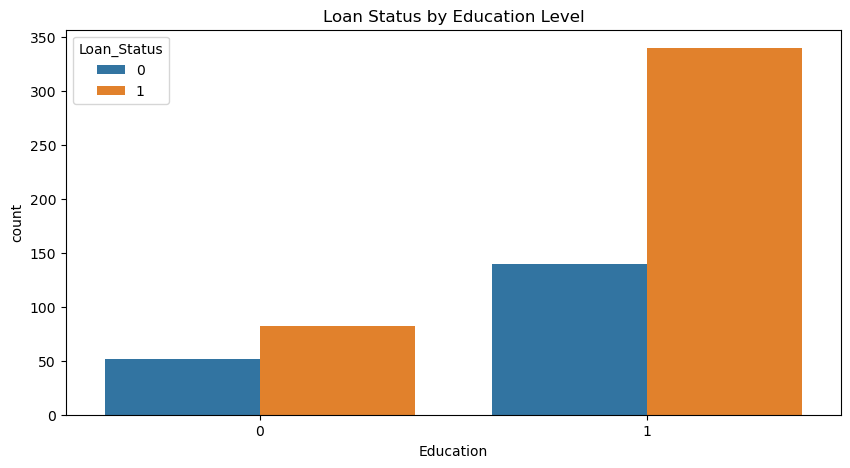

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Education'], hue=df['Loan_Status'])
plt.title("Loan Status by Education Level")
plt.show()

## Analysis of Loan Status by Education Level
Higher Loan Approvals for Educated Applicants

Applicants with higher education (1) receive significantly more loan approvals than those with lower education (0).
This suggests that education level may positively influence a lender’s decision.
Loan Rejections are Higher for Less-Educated Applicants

The number of rejected loans for less-educated applicants is relatively high compared to their approvals.
This may indicate that lenders associate higher education with financial stability or better earning potential.
Educated Applicants Apply More for Loans

The total number of applications is significantly higher among educated individuals.
This could be because higher education often leads to better-paying jobs, which increases financial confidence and borrowing capacity.

## Key Insights & Recommendations
Less-educated applicants may face more difficulties securing loans due to lenders perceiving them as higher risk.
Financial literacy programs and better documentation of income stability could help lower-educated applicants improve their chances.
Further analysis on income, credit history, and employment status could reveal whether education is a direct factor or correlated with other financial stability indicators.

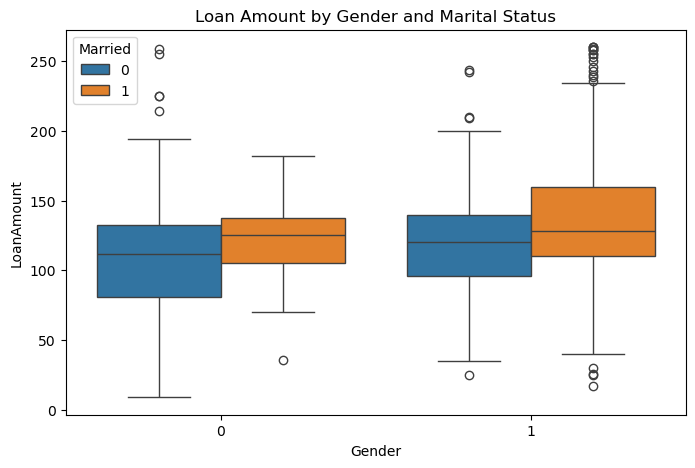

In [23]:
# Loan Amount Distribution by Gender & Marital Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Gender'], y=df['LoanAmount'], hue=df['Married'])
plt.title("Loan Amount by Gender and Marital Status")
plt.show()

## Analysis of Loan Amount by Gender and Marital Status
Loan Distribution by Gender

The plot shows loan amounts distributed across two genders (0 = Female, 1 = Male).
Males generally have higher loan amounts, with a wider spread and more outliers.
Females tend to have a lower median loan amount with fewer extreme values.
Impact of Marital Status

Married individuals (1) tend to have slightly higher median loan amounts compared to unmarried individuals (0).
The distribution of loan amounts is more spread out for married individuals, suggesting more variance in loan approvals based on marital status.
Outliers

Several high-value loan outliers are present, especially among married males.
This could indicate that married males are more likely to take larger loans, possibly due to financial responsibilities like homeownership or family needs.

## Key Insights & Recommendations
Gender Bias? The data suggests males receive higher loan amounts on average. It would be useful to analyze whether income levels or credit history play a role in this difference.
Marital Status Consideration Lenders may factor in marital status as a stability indicator, but further analysis is needed to confirm if this is due to actual income stability or just policy bias.

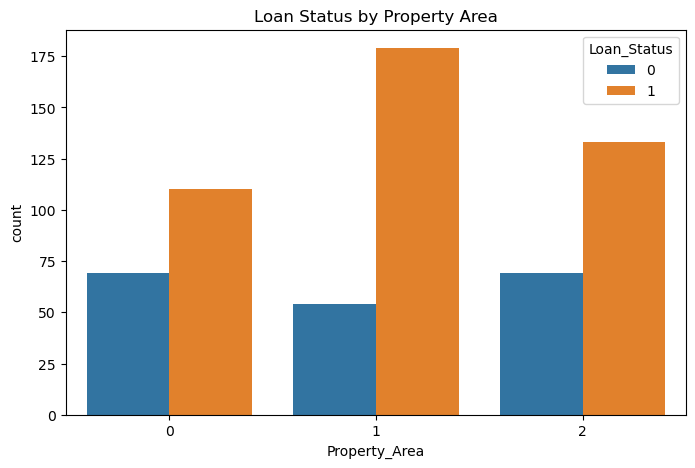

In [24]:
# Loan Approval by Property Area
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Property_Area'], hue=df['Loan_Status'])
plt.title("Loan Status by Property Area")
plt.show()

## Analysis of Loan Status by Property Area
Semiurban Areas (1) have the highest loan approvals

Most loans approved (Loan_Status = 1) are for applicants from semiurban areas.
This suggests that applicants in semiurban locations may have better eligibility criteria (e.g., higher income, better credit scores, stable employment, etc.).
Urban Areas (2) also see a high approval rate

Urban areas have the second-highest loan approval count.
However, they also have a notable number of rejections.
Rural Areas (0) have the lowest loan approvals

Rural areas have the fewest approvals and a relatively high rejection rate.
This may indicate that applicants in rural areas face challenges like lower income levels, unstable employment, or lack of proper financial documentation.

## Key Insights
Higher loan approvals in semiurban and urban areas may be due to better economic opportunities, higher property values, or stronger financial backgrounds of applicants.
Rural area applicants face higher rejection rates, possibly due to lower income levels or difficulty in meeting lending requirements.
Factors like income, employment type, credit history, or loan amount, might be the reasons behind this pattern better.

In [25]:
# Applicant Income vs Loan Approval
correlation = df[['ApplicantIncome', 'LoanAmount']].corr()
print("\nCorrelation between ApplicantIncome and LoanAmount:")
print(correlation)


Correlation between ApplicantIncome and LoanAmount:
                 ApplicantIncome  LoanAmount
ApplicantIncome         1.000000    0.186346
LoanAmount              0.186346    1.000000


## Key Insight
The positive correlation (0.186) suggests that as ApplicantIncome increases, LoanAmount also tends to increase, but the relationship is weak.

In [26]:
# Loan Amount vs No. of Dependents/ Loan Approval vs No. of Dependents
print("\nAverage Loan Amount by Number of Dependents:")
print(df.groupby('Dependents')['LoanAmount'].mean())

print("\nLoan Approval Rate by Number of Dependents:")
print(df.groupby('Dependents')['Loan_Status'].mean())


Average Loan Amount by Number of Dependents:
Dependents
0.0    124.347222
1.0    132.294118
2.0    138.059406
3.0    130.705882
Name: LoanAmount, dtype: float64

Loan Approval Rate by Number of Dependents:
Dependents
0.0    0.686111
1.0    0.647059
2.0    0.752475
3.0    0.647059
Name: Loan_Status, dtype: float64


## Analysis from Loan Amount and Approval Rate by Number of Dependents:
Average Loan Amount by Number of Dependents:
Applicants with 0 dependents: 124.35 (lowest average loan amount)
Applicants with 1 dependent: 132.29
Applicants with 2 dependents: 138.06 (highest average loan amount)
Applicants with 3+ dependents: 130.71
Observation:
Loan amounts increase as the number of dependents rises, peaking at 2 dependents.
The loan amount for 3 dependents drops slightly, which could indicate lenders being cautious with larger families.

## Loan Approval Rate by Number of Dependents:
0 dependents: 68.6% approval rate
1 dependent: 64.7% approval rate
2 dependents: 75.2% approval rate (highest approval rate)
3+ dependents: 64.7% approval rate
Observation:
Applicants with 2 dependents have the highest loan approval rate (75.2%).
Approval rates are lower for 1 or 3+ dependents (~64.7%), possibly due to concerns about financial burden.
Applicants with 0 dependents have a relatively high approval rate (68.6%), suggesting that fewer financial responsibilities make them less risky.

## Key Insights
Borrowers with 2 dependents tend to receive higher loan amounts and have the highest approval rates.
Applicants with 3+ dependents see a slight drop in both loan amounts and approval rates, possibly due to financial strain.
Applicants with no dependents have a fairly high approval rate, likely due to lower financial obligations.

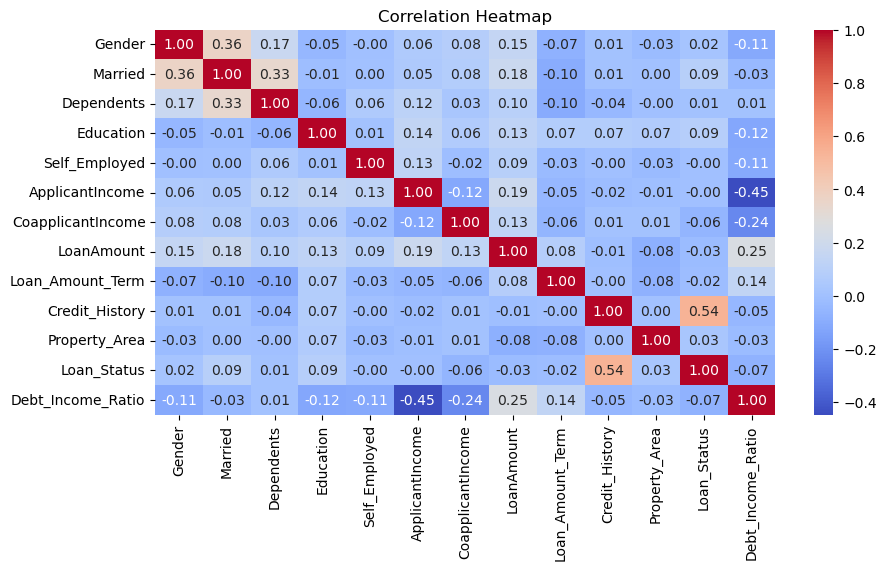

In [27]:
#Correlation Heatmap showing relationship between variables
plt.figure(figsize=(10, 5))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Probability & Statistics

In [28]:
# Compute descriptive statistics only for numerical columns
numeric_cols = df.select_dtypes(include=['number'])

print("\nDescriptive Statistics:")
print("Mean:")
print(numeric_cols.mean())

print("\nMedian:")
print(numeric_cols.median())

print("\nMode:")
print(numeric_cols.mode().iloc[0])

print("\nVariance:")
print(numeric_cols.var())

print("\nStandard Deviation:")
print(numeric_cols.std())


Descriptive Statistics:
Mean:
Gender                  0.817590
Married                 0.653094
Dependents              0.744300
Education               0.781759
Self_Employed           0.133550
ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            128.451140
Loan_Amount_Term      342.410423
Credit_History          0.855049
Property_Area           1.037459
Loan_Status             0.687296
Debt_Income_Ratio       0.022813
dtype: float64

Median:
Gender                  1.000000
Married                 1.000000
Dependents              0.000000
Education               1.000000
Self_Employed           0.000000
ApplicantIncome      3812.500000
CoapplicantIncome    1188.500000
LoanAmount            128.000000
Loan_Amount_Term      360.000000
Credit_History          1.000000
Property_Area           1.000000
Loan_Status             1.000000
Debt_Income_Ratio       0.023454
dtype: float64

Mode:
Gender                  1.000000
Married                 1.000000

## Insights
#### VARIANCE
High variance in income and loan amounts → Suggests a wide range of applicant financial situations.
Low variance in categorical features (Gender, Married, Education, etc.) → Implies the dataset might be imbalanced in these categories.
Debt-to-Income Ratio has almost no variance → It might not be a useful feature for prediction.

#### STANDARD DEVIATION
Loan Amount, Income, and Loan Term have high variability → Important factors for predicting approval.
Gender, Education, and Credit History have little variability → Might not add much predictive power.
Debt-to-Income Ratio has almost no variation → Consider dropping or transforming this feature.

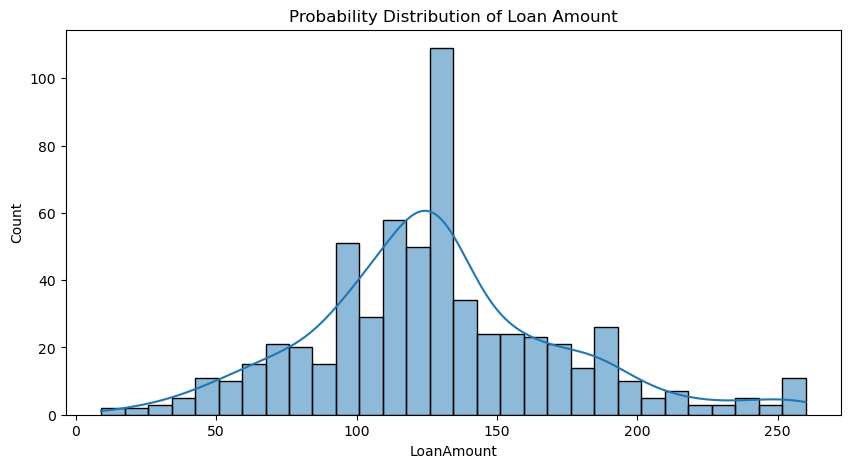

In [29]:
# Probability Distribution of LoanAmount
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title("Probability Distribution of Loan Amount")
plt.show()

## Based on the plot, loan amounts are positively skewed (right-skewed).
Loan amounts cannot be negative, which aligns with a Log-Normal or Exponential distribution.
Real-world justification: Loan amounts typically have a long right tail because a few applicants take very large loans, while most take moderate amounts.

In [30]:
#Correlation between ApplicantIncome, CoapplicantIncome, and LoanAmount
print("\nCorrelation Matrix:")
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr())


Correlation Matrix:
                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.186346
CoapplicantIncome        -0.116605           1.000000    0.131401
LoanAmount                0.186346           0.131401    1.000000


## Key Insights
Loan Amount has a weak relationship with income.
Co-applicants don’t significantly impact loan amount.
If the applicant earns more, they often apply alone (without a co-applicant).

In [31]:
# Hypothesis Testing: Is Loan Approval independent of Gender?
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['Loan_Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test for Loan Approval vs Gender:")
print(f"Chi2 Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print("Reject Null Hypothesis: Loan Approval is dependent on Gender.")
else:
    print("Fail to Reject Null Hypothesis: Loan Approval is independent of Gender.")


Chi-Square Test for Loan Approval vs Gender:
Chi2 Statistic: 0.11087854691241235, P-value: 0.7391461310869638
Fail to Reject Null Hypothesis: Loan Approval is independent of Gender.


## Machine Learning Model Building

In [32]:
# Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Features
y = df['Loan_Status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardizing Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Model Training - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [35]:
# Model Training - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [36]:
# Model Training - Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Predictions
y_pred = model.predict(X_test)

In [38]:
#Printing out the first 10 predictions made
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [40]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Evaluation:
Accuracy: 0.78
Precision: 0.76
Recall: 0.97
F1-score: 0.85

Confusion Matrix:
[[18 25]
 [ 2 78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



## Key Insights
Overall Model Performance
Accuracy = 78% - The model correctly predicts loan approval 78% of the time.
F1-Score = 85% - A good balance between precision & recall.

Confusion Matrix Breakdown
18 True Negatives (TN): Correctly predicted "Not Approved" (0).
25 False Positives (FP): Incorrectly predicted "Approved" when it was actually "Not Approved".
2 False Negatives (FN): Incorrectly predicted "Not Approved" when it was actually "Approved".
78 True Positives (TP): Correctly predicted "Approved" (1).

In [42]:
print("\nFeature Importance (Random Forest):")
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)


Feature Importance (Random Forest):
Credit_History       0.260476
Debt_Income_Ratio    0.182150
ApplicantIncome      0.139562
LoanAmount           0.128520
CoapplicantIncome    0.087475
Property_Area        0.044926
Loan_Amount_Term     0.043411
Dependents           0.039482
Married              0.022687
Education            0.019567
Gender               0.016686
Self_Employed        0.015057
dtype: float64


## Key Insights
Credit History is the number one factor - Clients should work on maintaining a clean repayment record.
Debt-to-Income Ratio should be managed - Reduce existing debts before applying for a loan.
Income and Loan Amount Balance - Borrowing within income limits increases approval chances.
Coapplicants Income - Having a financially strong coapplicant could improve approval odds.

## CHALLENGES & LIMITATIONS
During the analysis and prediction process, several challenges were encountered:
1. Lack of Proper Column Descriptions – Some headers, such as Loan_Amount, were ambiguous. It was unclear whether this represented the amount provided by the lender or the amount applied for by the borrower.
2. Data Quality and Size – The dataset was relatively small, which limited the performance of the prediction model. This could pose a challenge in future prediction tasks, where a larger dataset is essential for improving model accuracy.

## RECOMMENDATIONS
1. Lenders should focus on applicants' credit history when making decisions. Borrowers should work on improving their credit scores by making timely payments and reducing outstanding debts.
2. Financial institutions should assess an applicant's income-to-debt ratio carefully. Applicants should aim to reduce their debt obligations before applying for loans.
3. Loan approval should not solely depend on income; other financial indicators like creditworthiness and repayment history should be considered.
4. Lenders may reconsider strict policies on applicants with dependents. Borrowers with multiple dependents should provide strong financial proof to increase their chances of approval.